<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%204/Modulo_4_Ejercicio_1_Matriz_Confusion_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 1: Análisis de Matriz de Confusión en Clasificación Binaria (Nivel: Básico)**
#### Evaluación del rendimiento de un modelo de clasificación en la detección de defectos en piezas metálicas

### **Introducción**
En este ejercicio, construiremos y analizaremos una **Matriz de Confusión** para evaluar el rendimiento de un modelo de clasificación binaria en la detección de defectos en piezas metálicas. Este análisis es crucial para interpretar la efectividad del modelo y comprender las métricas derivadas como Precisión, Recall, Exactitud y F1 Score.

La Matriz de Confusión es una herramienta fundamental para la evaluación de modelos de clasificación, ya que nos permite visualizar cómo se distribuyen las predicciones del modelo en función de las clases reales.

In [1]:
# Celda 1: Carga de librerías y configuración del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
sns.set(style='whitegrid')

### **Descripción del dataset**
Se utilizará el dataset `control_calidad_piezas_metalicas.csv`, que contiene información sobre piezas metálicas y su estado de calidad. El objetivo es clasificar las piezas como **'OK'** (sin defecto) o **'KO'** (defectuosas).

In [2]:
# Celda 2: Carga del dataset
dataset_path = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/control_calidad_piezas_metalicas.csv'
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas del dataset
data.head()

,ID_pieza,Temperatura,Presión_molde,Tiempo_inyección,Viscosidad_material,Humedad_ambiente,Energía_consumida,Operario_turno,Día_semana,Lote_producción,Desgaste_molde,Tiempo_desmoldeo,Ancho_pieza,Altura_pieza,Defecto
0,1,209.934283,1529.461844,6.030595,2.450860,39.217029,5.779265,Operario_3,Lunes,Lote_13,0.458149,3.688541,50.157288,101.279351,OK
1,2,197.234714,1480.767531,3.844645,3.121770,43.969118,9.031166,Operario_5,Viernes,Lote_6,0.505443,3.834900,59.949957,96.724974,KO
2,3,212.953771,1785.537227,5.575437,2.862635,43.672496,6.462271,Operario_4,Miércoles,Lote_14,0.597260,3.286921,43.763784,118.998853,KO
3,4,230.460597,1959.849342,4.380762,2.217833,33.957695,12.616841,Operario_5,Domingo,Lote_13,0.332967,3.305580,52.769876,115.421844,KO
4,5,195.316933,1706.054083,4.672597,1.591750,72.752929,10.004330,Operario_5,Lunes,Lote_17,0.565406,2.961457,46.792873,97.644322,OK


In [3]:
# Celda 3: Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_pieza             50000 non-null  int64  
 1   Temperatura          50000 non-null  float64
 2   Presión_molde        50000 non-null  float64
 3   Tiempo_inyección     50000 non-null  float64
 4   Viscosidad_material  50000 non-null  float64
 5   Humedad_ambiente     50000 non-null  float64
 6   Energía_consumida    50000 non-null  float64
 7   Operario_turno       50000 non-null  object 
 8   Día_semana           50000 non-null  object 
 9   Lote_producción      50000 non-null  object 
 10  Desgaste_molde       50000 non-null  float64
 11  Tiempo_desmoldeo     50000 non-null  float64
 12  Ancho_pieza          50000 non-null  float64
 13  Altura_pieza         50000 non-null  float64
 14  Defecto              50000 non-null  object 
dtypes: float64(10), int64(1), object(4)


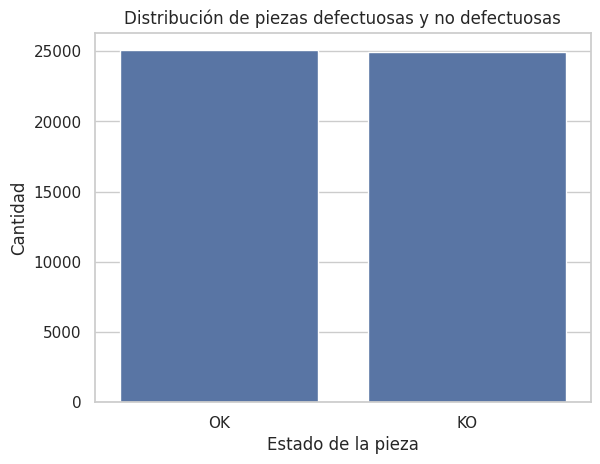

In [4]:
# Celda 4: Distribución de la variable objetivo
sns.countplot(x='Defecto', data=data)
plt.title('Distribución de piezas defectuosas y no defectuosas')
plt.xlabel('Estado de la pieza')
plt.ylabel('Cantidad')
plt.show()

### **Preprocesamiento de los datos**
Se seleccionan las variables numéricas y se normalizan antes de entrenar el modelo. Además, convertimos la variable objetivo en valores numéricos para su uso en modelos de machine learning.

In [5]:
# Celda 5: Normalización de los datos
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las variables numéricas
numeric_features = ['Temperatura', 'Presión_molde', 'Tiempo_inyección', 'Viscosidad_material', 'Humedad_ambiente', 'Energía_consumida', 'Desgaste_molde', 'Tiempo_desmoldeo', 'Ancho_pieza', 'Altura_pieza']

X = data[numeric_features]
y = data['Defecto'].map({'OK': 0, 'KO': 1})  # Convertir etiquetas a valores numéricos

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### **Entrenamiento del modelo**
Se entrenará un modelo de **Regresión Logística** para la clasificación de piezas defectuosas.

In [6]:
# Celda 6: Entrenamiento del modelo de Regresión Logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

### **Evaluación del modelo**
Se calculará la **Matriz de Confusión** y las métricas derivadas (Precisión, Recall, F1 Score, Exactitud).

**Interpretación de métricas:**
- **Precisión (Precision)**: Proporción de predicciones positivas que fueron correctas.
- **Recall (Sensibilidad)**: Proporción de defectos reales detectados correctamente.
- **Exactitud (Accuracy)**: Proporción total de predicciones correctas.
- **F1 Score**: Promedio armónico entre Precisión y Recall, útil cuando las clases están desbalanceadas.

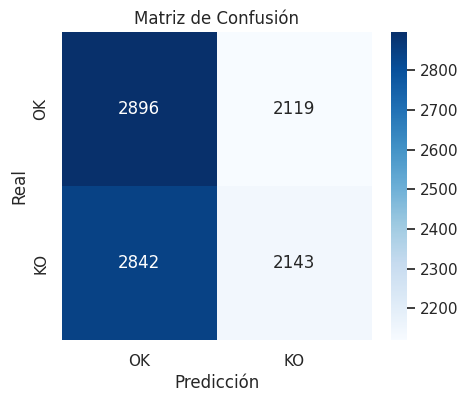

Exactitud (Accuracy): 0.50
Precisión (Precision): 0.50
Recall (Sensibilidad): 0.43
F1 Score: 0.46


In [7]:
# Celda 7: Matriz de Confusión y Métricas
matriz_confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['OK', 'KO'], yticklabels=['OK', 'KO'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Cálculo de métricas adicionales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Exactitud (Accuracy): {accuracy:.2f}')
print(f'Precisión (Precision): {precision:.2f}')
print(f'Recall (Sensibilidad): {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

### **Conclusiones**
En este ejercicio, construimos y analizamos una **Matriz de Confusión** para evaluar el rendimiento de un modelo de clasificación binaria en la detección de defectos en piezas metálicas.

**Hallazgos clave:**
- La **Precisión** nos indica qué proporción de las predicciones de defectos fue correcta.
- El **Recall** nos muestra cuántos de los defectos reales fueron detectados.
- El **F1 Score** balancea Precisión y Recall, siendo útil en problemas donde ambas métricas son importantes.
